##Conexion

In [57]:
!pip install PyDrive
!pip install --upgrade category_encoders

In [58]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [59]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [60]:
from google.colab import files

In [61]:
id_train_labels = '1o8fEed65R8219m5iOJoZgvHXaTGwWE4H'
id_train_values = "1RCoa3FWbpcHVC6imhaQQFQEAWNW0qkh0" 
id_test_values = '1xBGPZbt3BYxe1OOYGMJuGnXe_pEqFZ1a'
id_submission_format = "1ei8BhsAAhZpZ8sRqEOVGl12y0JAPdXGV"
test_values_preproces = "1UM62_roeJn9DIs05DYnwhvRCIdaLzeyw"
train_values_features = "10yam2R0-Nj9qxF_nKMbGbGuwxgrt1rFv"

downloaded_train_labels = drive.CreateFile({'id': id_train_labels})
downloaded_train_values = drive.CreateFile({'id': id_train_values})
downloaded_test_values = drive.CreateFile({'id': id_test_values})
downloaded_submission_format = drive.CreateFile({'id': id_submission_format})
downloaded_test_values_preproces = drive.CreateFile({'id': test_values_preproces})
downloaded_train_values_features = drive.CreateFile({'id': train_values_features})

In [62]:

downloaded_train_labels.GetContentFile('train_labels.csv')
downloaded_train_values.GetContentFile('train_values.csv')
downloaded_test_values.GetContentFile('test_values.csv')
downloaded_submission_format.GetContentFile('submission_format.csv')
downloaded_test_values_preproces.GetContentFile('test_values_preproces.csv')
downloaded_train_values_features.GetContentFile('train_values_features.csv')

In [63]:

train_values = pd.read_csv('train_values.csv', dtype={
    'building_id': 'int64', 'geo_level_1_id': 'int64',
    'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',
    'count_floors_pre_eq': 'int8', 'age': 'int32',
    'area_percentage': 'int32', 'height_percentage': 'int32',
    'land_surface_condition': 'category', 'foundation_type': 'category',
    'roof_type': 'category', 'ground_floor_type': 'category', 'other_floor_type': 'category',
    'position': 'category', 'plan_configuration': 'category', 'has_superstructure_adobe_mud': 'int8',
    'has_superstructure_mud_mortar_stone': 'int8', 'has_superstructure_stone_flag': 'int8',
    'has_superstructure_cement_mortar_stone': 'int8', 'has_superstructure_mud_mortar_brick': 'int8',
    'has_superstructure_cement_mortar_brick': 'int8', 'has_superstructure_timber': 'int8',
    'has_superstructure_bamboo': 'int8', 'has_superstructure_rc_non_engineered': 'int8',
    'has_superstructure_rc_engineered': 'int8', 'has_superstructure_other': 'int8',
    'has_superstructure_other': 'int8', 'legal_ownership_status': 'category',
    'has_secondary_use': 'bool', 'has_secondary_use_agriculture': 'bool',
    'has_secondary_use_hotel': 'bool', 'has_secondary_use_rental': 'bool',
    'has_secondary_use_institution': 'bool', 'has_secondary_use_school': 'bool',
    'has_secondary_use_industry': 'bool', 'has_secondary_use_health_post': 'bool',
    'has_secondary_use_gov_office': 'bool', 'has_secondary_use_use_police': 'bool',
    'has_secondary_use_other': 'bool', 'count_families': 'int8'
})
train_labels = pd.read_csv('train_labels.csv', dtype={
    'damage_grade': 'int16'
})

test_values = pd.read_csv('test_values.csv', dtype={
  'building_id': 'int64', 'geo_level_1_id': 'int64',
    'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',
    'count_floors_pre_eq': 'int8', 'age': 'int32',
    'area_percentage': 'int32', 'height_percentage': 'int32',
    'land_surface_condition': 'category', 'foundation_type': 'category',
    'roof_type': 'category', 'ground_floor_type': 'category', 'other_floor_type': 'category',
    'position': 'category', 'plan_configuration': 'category', 'has_superstructure_adobe_mud': 'int8',
    'has_superstructure_mud_mortar_stone': 'int8', 'has_superstructure_stone_flag': 'int8',
    'has_superstructure_cement_mortar_stone': 'int8', 'has_superstructure_mud_mortar_brick': 'int8',
    'has_superstructure_cement_mortar_brick': 'int8', 'has_superstructure_timber': 'int8',
    'has_superstructure_bamboo': 'int8', 'has_superstructure_rc_non_engineered': 'int8',
    'has_superstructure_rc_engineered': 'int8', 'has_superstructure_other': 'int8',
    'has_superstructure_other': 'int8', 'legal_ownership_status': 'category',
    'has_secondary_use': 'bool', 'has_secondary_use_agriculture': 'bool',
    'has_secondary_use_hotel': 'bool', 'has_secondary_use_rental': 'bool',
    'has_secondary_use_institution': 'bool', 'has_secondary_use_school': 'bool',
    'has_secondary_use_industry': 'bool', 'has_secondary_use_health_post': 'bool',
    'has_secondary_use_gov_office': 'bool', 'has_secondary_use_use_police': 'bool',
    'has_secondary_use_other': 'bool', 'count_families': 'int8'
})

test_values_preproces = pd.read_csv('test_values_preproces.csv')
train_values_features = pd.read_csv('train_values_features.csv')


In [64]:
train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False


In [65]:
labels_and_values = pd.merge(
    train_labels, train_values, how='inner', on='building_id')

In [66]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='multiclass', random_state=5)


##Feature Engineering

In [67]:
labels_and_values['volume_percentage'] = labels_and_values['height_percentage'] * labels_and_values['area_percentage']

In [68]:
test_values['volume_percentage'] = test_values['height_percentage'] * test_values['area_percentage']

##One Hot Encoding

In [69]:
test_values = pd.get_dummies(test_values, columns=['land_surface_condition'], drop_first=True)
test_values = pd.get_dummies(test_values, columns=['foundation_type'],drop_first=True)
test_values = pd.get_dummies(test_values, columns=['roof_type'],drop_first=True)
test_values = pd.get_dummies(test_values, columns=['ground_floor_type'],drop_first=True)
test_values = pd.get_dummies(test_values, columns=['plan_configuration'],drop_first=True)
test_values = pd.get_dummies(test_values, columns=['position'],drop_first=True)

In [70]:
labels_and_values = pd.get_dummies(labels_and_values, columns=['land_surface_condition'], drop_first=True)
labels_and_values = pd.get_dummies(labels_and_values, columns=['foundation_type'],drop_first=True)
labels_and_values = pd.get_dummies(labels_and_values, columns=['roof_type'],drop_first=True)
labels_and_values = pd.get_dummies(labels_and_values, columns=['ground_floor_type'],drop_first=True)
labels_and_values = pd.get_dummies(labels_and_values, columns=['plan_configuration'],drop_first=True)
labels_and_values = pd.get_dummies(labels_and_values, columns=['position'],drop_first=True)


##Filtrando Data Set

In [71]:
labels_and_values = labels_and_values[labels_and_values['age']!=995]

In [73]:
test_values = test_values[['geo_level_1_id','geo_level_2_id','geo_level_3_id','area_percentage','age',"height_percentage",'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick', 'has_superstructure_timber','has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered', 'has_superstructure_other',"volume_percentage",	"land_surface_condition_o",	"land_surface_condition_t",
    "foundation_type_i","foundation_type_r",	"foundation_type_u","foundation_type_w",	"roof_type_q",	"roof_type_x",	"ground_floor_type_m",
    "ground_floor_type_v","ground_floor_type_x",	"ground_floor_type_z",	"plan_configuration_c",	"plan_configuration_d",
    "plan_configuration_f",	"plan_configuration_m",	"plan_configuration_n",	"plan_configuration_o",	"plan_configuration_q",
    "plan_configuration_s",	"plan_configuration_u",	"position_o",	"position_s",	"position_t"]]

In [74]:
features = labels_and_values[['geo_level_1_id','geo_level_2_id','geo_level_3_id','area_percentage','age',"height_percentage",'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick', 'has_superstructure_timber','has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered', 'has_superstructure_other',"volume_percentage",	"land_surface_condition_o",	"land_surface_condition_t",
    "foundation_type_i","foundation_type_r",	"foundation_type_u","foundation_type_w",	"roof_type_q",	"roof_type_x",	"ground_floor_type_m",
    "ground_floor_type_v","ground_floor_type_x",	"ground_floor_type_z",	"plan_configuration_c",	"plan_configuration_d",
    "plan_configuration_f",	"plan_configuration_m",	"plan_configuration_n",	"plan_configuration_o",	"plan_configuration_q",
    "plan_configuration_s",	"plan_configuration_u",	"position_o",	"position_s",	"position_t"]]

In [75]:
damage_prediction = labels_and_values['damage_grade']

##Creacion del Set de Entrenamiento y Test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(features, damage_prediction, test_size=0.2, random_state=45)

##LGBM

In [77]:
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt



lgbm = LGBMClassifier(objective='multiclass', random_state=5)

lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='multiclass', random_state=5, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

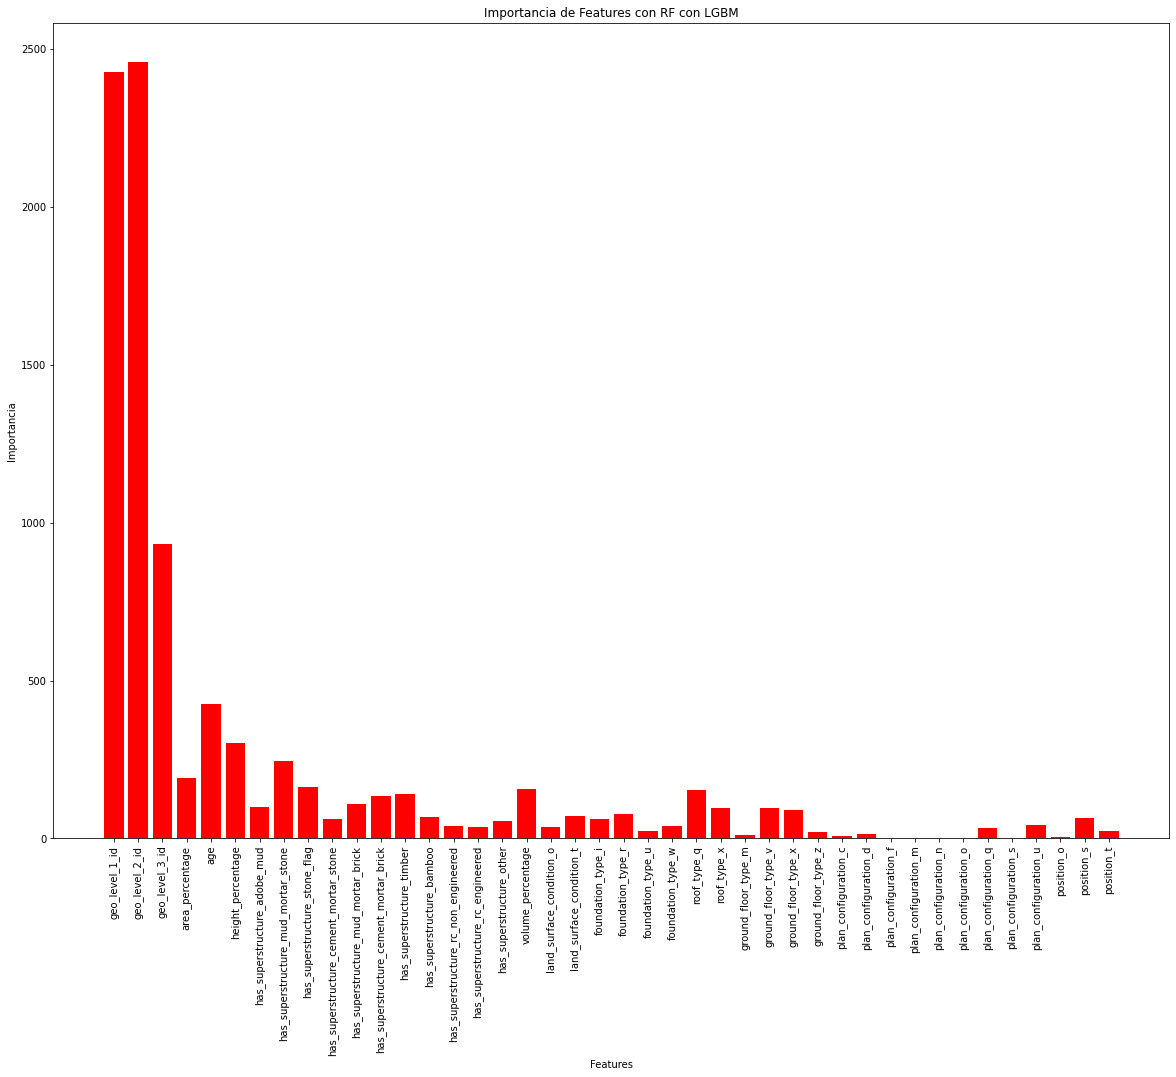

In [78]:

plt.subplots(figsize=(20,15))
plt.bar(X_train.columns, lgbm.feature_importances_, color = 'red')
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia de Features con RF con LGBM')
plt.xticks(rotation=90)

plt.show() 

In [79]:
predicciones = lgbm.predict(X_test)

In [80]:
f1_score(predicciones, y_test, average='micro')

0.7055918831857725